<a href="https://colab.research.google.com/github/arumisoy/work/blob/main/Day2_work_rumikotanaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [29]:
#データの読み込み
df = pd.read_csv("/content/drive/MyDrive/ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [21]:
#データの情報
df.shape
df.info()
#欠損値の集計
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

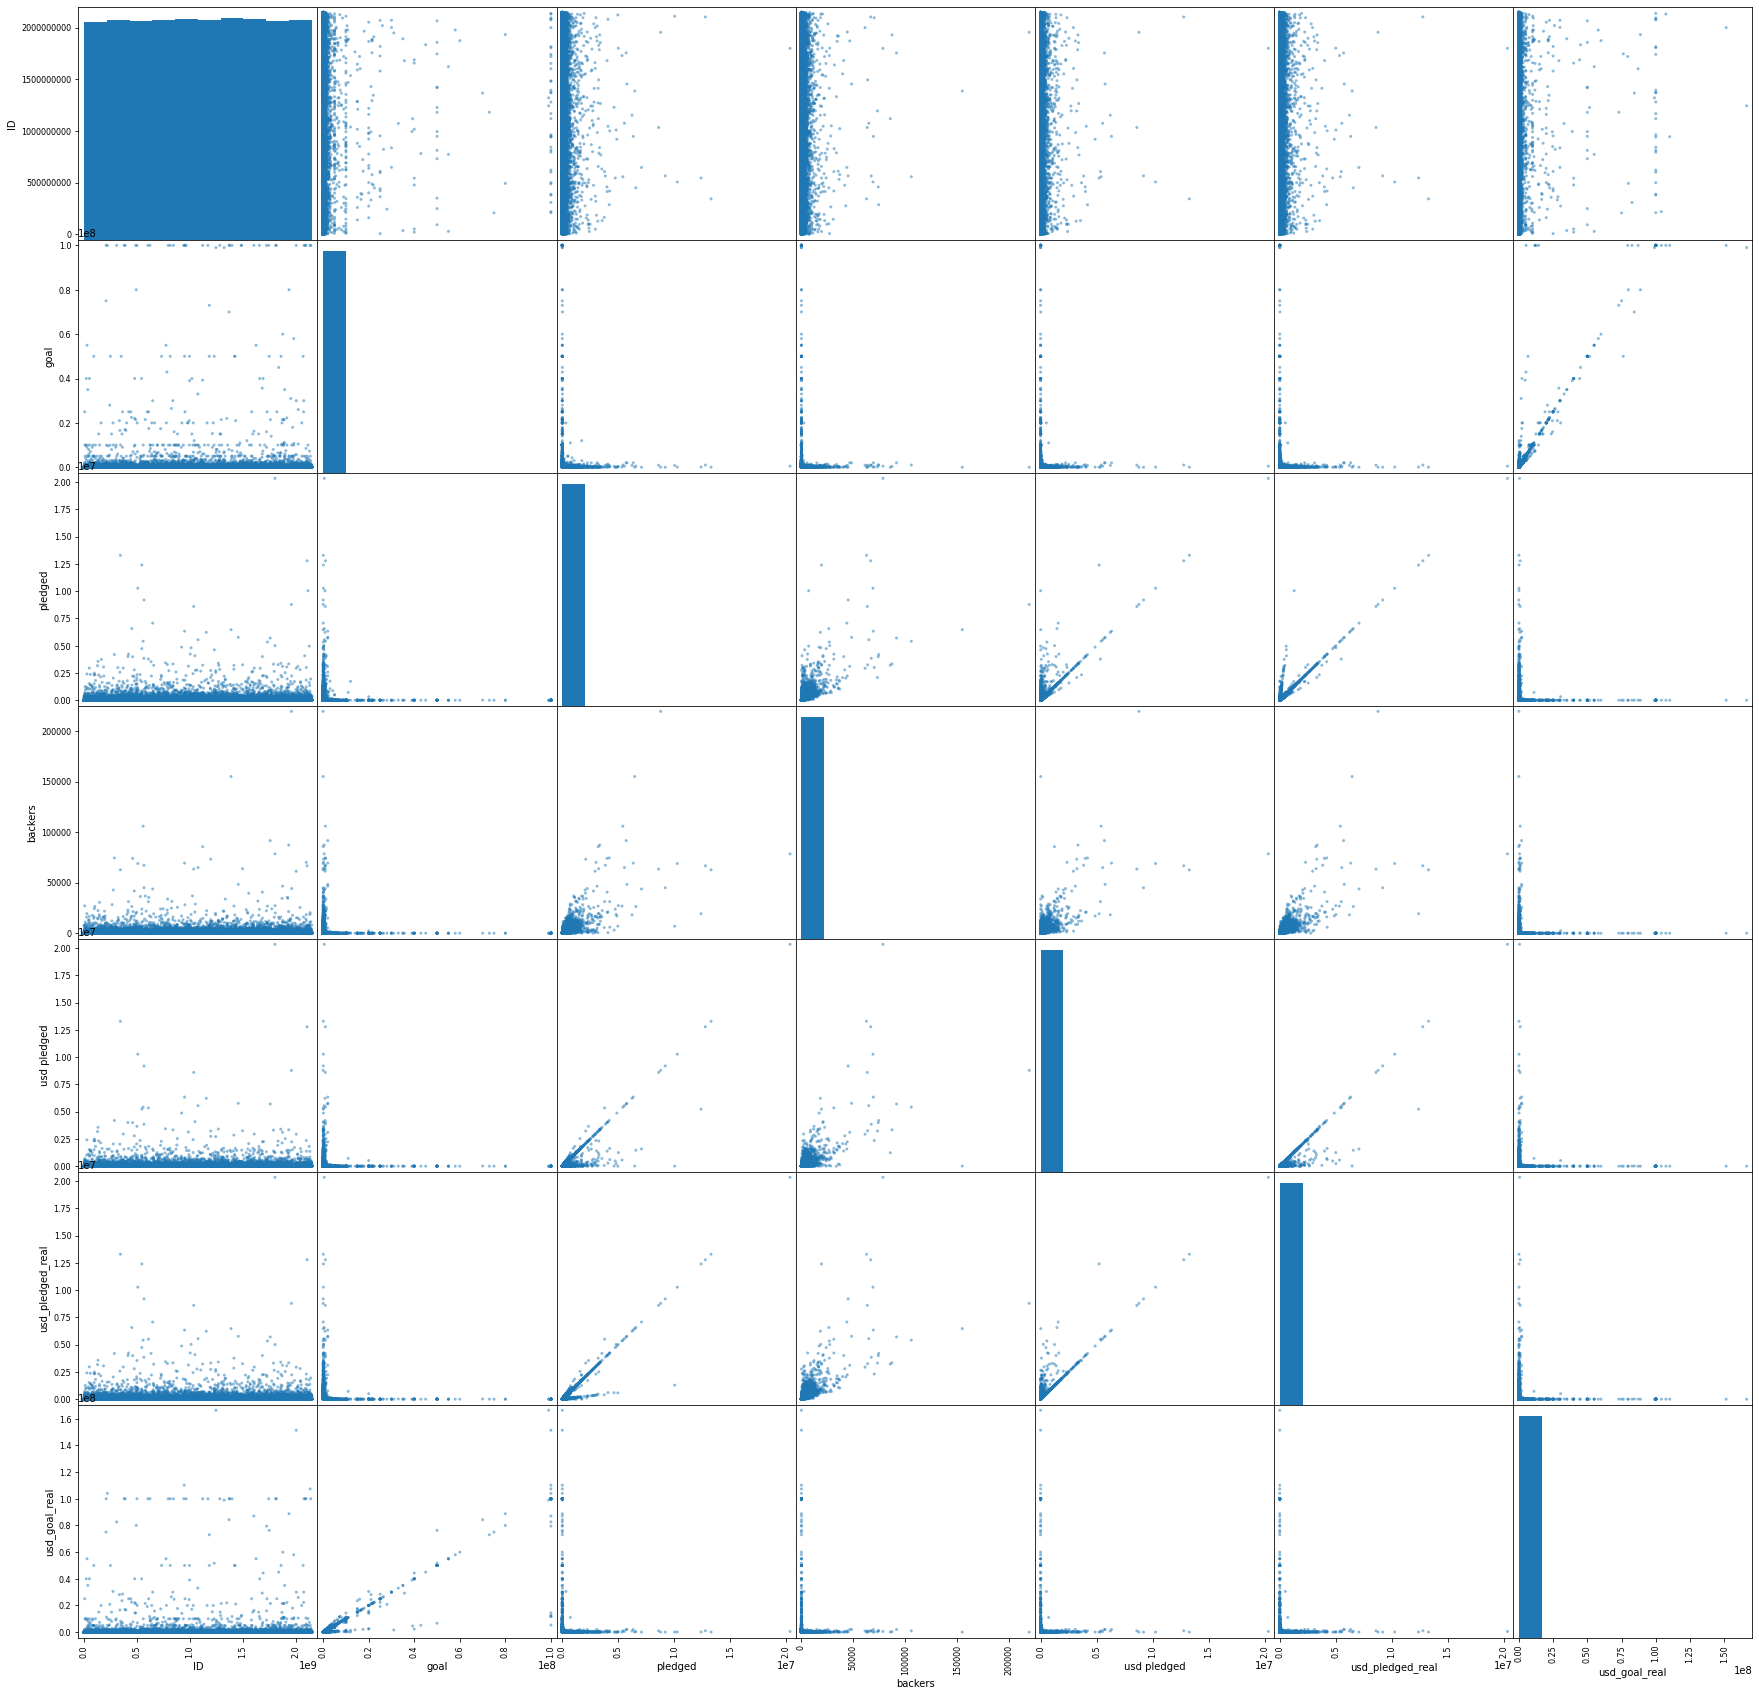

In [ ]:
#散布図行列
pd.plotting.scatter_matrix(df, figsize=(30,30))
plt.show()

In [22]:
#stateの要素の個数
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [30]:
#成功だけを抽出したDFと失敗だけを抽出したDF
df_success = df[df['state']=='successful']
df_failed =  df[df['state']=='failed']
#両方を結合
df = pd.concat([df_success,df_failed])
#successful=1 failed=0
df.loc[df['state'] =='successful', 'state'] = 1
df.loc[df['state'] =='failed', 'state'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 5 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331675 non-null  int64  
 1   name              331672 non-null  object 
 2   category          331675 non-null  object 
 3   main_category     331675 non-null  object 
 4   currency          331675 non-null  object 
 5   deadline          331675 non-null  object 
 6   goal              331675 non-null  float64
 7   launched          331675 non-null  object 
 8   pledged           331675 non-null  float64
 9   state             331675 non-null  object 
 10  backers           331675 non-null  int64  
 11  country           331675 non-null  object 
 12  usd pledged       331465 non-null  float64
 13  usd_pledged_real  331675 non-null  float64
 14  usd_goal_real     331675 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB


In [31]:
#１個でも欠損値がある行を削除
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 5 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331462 non-null  int64  
 1   name              331462 non-null  object 
 2   category          331462 non-null  object 
 3   main_category     331462 non-null  object 
 4   currency          331462 non-null  object 
 5   deadline          331462 non-null  object 
 6   goal              331462 non-null  float64
 7   launched          331462 non-null  object 
 8   pledged           331462 non-null  float64
 9   state             331462 non-null  object 
 10  backers           331462 non-null  int64  
 11  country           331462 non-null  object 
 12  usd pledged       331462 non-null  float64
 13  usd_pledged_real  331462 non-null  float64
 14  usd_goal_real     331462 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB


カラム名	意味
ID	KICKSTARTER上で管理するための番号
name	プロジェクト名
category	第2カテゴリー(下記main_categoryで分けられた分類をさらに細分化するためのカテゴリー)
main_category	第1カテゴリー
currency	募集した通貨の単位
deadline	支援金の公募期間の締切日
goal	目標公募金額
launched	支援金の公募期間の開始日
pledged	公募された金額
state	プロジェクトの資金調達が目標額に到達したかどうかの成功可否
backers	支援者数
country	どの国のプロジェクトか
usd pledged	KICKSTARTER運営側がドル換算した、公募された金額
usd_pledged_real	Fixer.io APIを利用してドル換算した、公募された金額
usd_goal_real	Fixer.io APIを利用してドル換算した、目標公募金額

In [32]:
#使わない列を削除
df = df.drop(['ID', 'name', 'category', 'currency', 'deadline', 'launched','pledged', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 5 to 378660
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   main_category  331462 non-null  object 
 1   goal           331462 non-null  float64
 2   state          331462 non-null  object 
 3   backers        331462 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 12.6+ MB


In [33]:
#ダミー変数
df = pd.get_dummies(df,drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 5 to 378660
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   goal                        331462 non-null  float64
 1   backers                     331462 non-null  int64  
 2   main_category_Comics        331462 non-null  uint8  
 3   main_category_Crafts        331462 non-null  uint8  
 4   main_category_Dance         331462 non-null  uint8  
 5   main_category_Design        331462 non-null  uint8  
 6   main_category_Fashion       331462 non-null  uint8  
 7   main_category_Film & Video  331462 non-null  uint8  
 8   main_category_Food          331462 non-null  uint8  
 9   main_category_Games         331462 non-null  uint8  
 10  main_category_Journalism    331462 non-null  uint8  
 11  main_category_Music         331462 non-null  uint8  
 12  main_category_Photography   331462 non-null  uint8  
 13  main_category_

In [37]:
#モデルの作成
y = df["state_1"].values
X = df.drop("state_1", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#

In [38]:
#ロジスティック回帰
clf = SGDClassifier(loss = "log", penalty = "none",random_state=1234)
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='none', power_t=0.5,
              random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
#評価
clf.score(X_test, y_test)

0.8929449564810764